In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('exchange-rate-twi.csv')
df.columns = ['Month', 'Exchange_Rate']
df.info()
print()
print(df.shape)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          304 non-null    int64  
 1   Exchange_Rate  304 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.9 KB

(304, 2)


,Month,Exchange_Rate
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2
5,6,99.2
6,7,99.2
7,8,99.3
8,9,100.0
9,10,100.0


In [16]:
df = df.set_index('Month')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 1 to 304
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Exchange_Rate  304 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


<Figure size 1000x600 with 0 Axes>

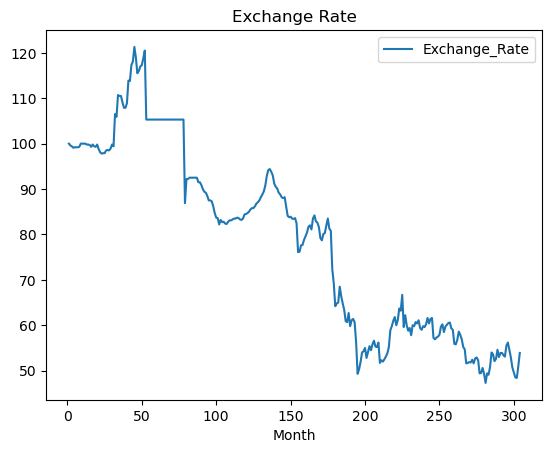

In [17]:
plt.figure(figsize=[10,6])
df.plot()
plt.legend(loc='best')
plt.title('Exchange Rate')
plt.show()

#### Divide the Dataset into Train & Test dataset for Forecasting

In [18]:
train_len = 212
train = df[0:train_len]
test = df[train_len:]

#### Simple Average Forecasting

In [19]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Exchange_Rate'].mean()

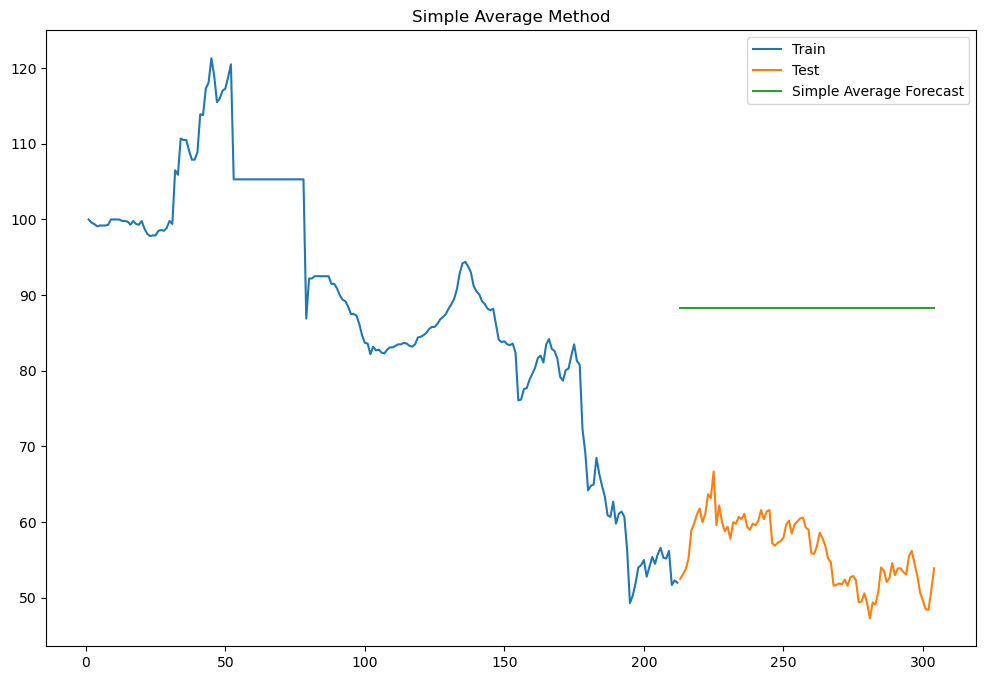

In [20]:
plt.figure(figsize=[12,8])
plt.plot(train['Exchange_Rate'], label='Train')
plt.plot(test['Exchange_Rate'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [21]:
train['Exchange_Rate'].mean()

88.3254716981132

#### Naive Forecasting

In [22]:
y_hat_naive = test.copy()
y_hat_naive['Naive Method'] = train['Exchange_Rate'][train_len]

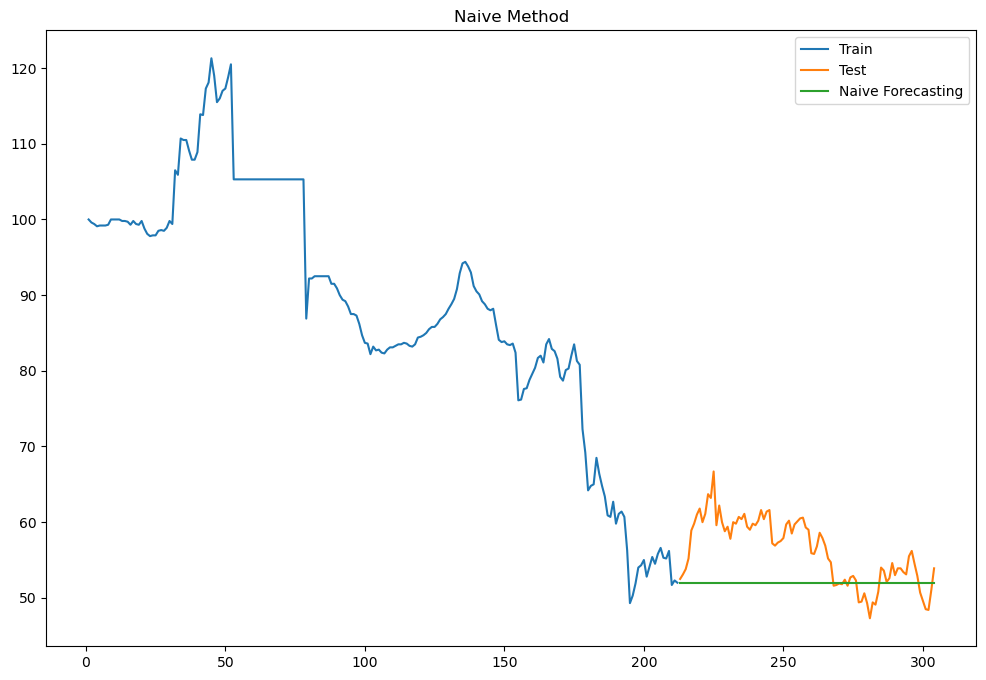

In [23]:
plt.figure(figsize=[12,8])
plt.plot(train['Exchange_Rate'], label='Train')
plt.plot(test['Exchange_Rate'], label='Test')
plt.plot(y_hat_naive['Naive Method'], label='Naive Forecasting')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
rmse = np.sqrt(mean_squared_error(test['Exchange_Rate'], y_hat_naive['Naive Method'])).round(2)
mape = (np.mean(np.abs(test['Exchange_Rate'] - y_hat_naive['Naive Method'])/test['Exchange_Rate'])*100).round(2)

print(rmse, mape, f"accuracy:{100-mape}")

5.98 8.41 accuracy:91.59


In [26]:
rmse = np.sqrt(mean_squared_error(test['Exchange_Rate'], y_hat_avg['avg_forecast'])).round(2)
mape = (np.mean(np.abs(test['Exchange_Rate'] - y_hat_avg['avg_forecast'])/test['Exchange_Rate'])*100).round(2)

print(rmse, mape, f"accuracy:{100-mape}")

32.42 58.12 accuracy:41.88


#### Simple Moving Average Forecasting

In [47]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma["sma_forecast"] = df['Exchange_Rate'].rolling(ma_window).mean()
y_hat_sma["sma_forecast"][train_len:] = y_hat_sma["sma_forecast"][train_len]

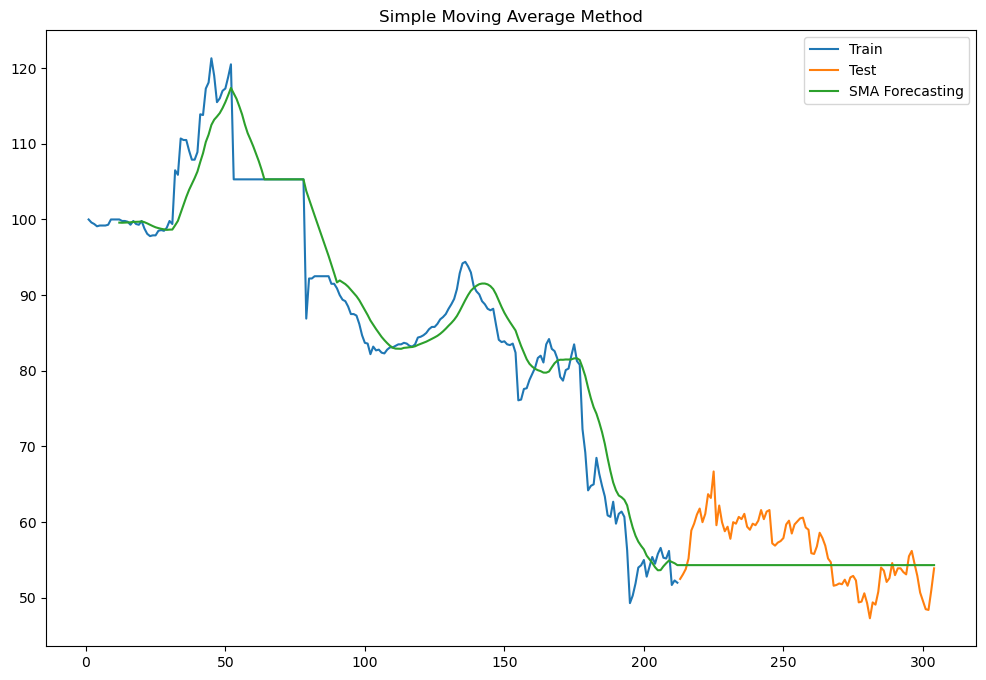

In [48]:
plt.figure(figsize=[12,8])
plt.plot(train['Exchange_Rate'], label='Train')
plt.plot(test['Exchange_Rate'], label='Test')
plt.plot(y_hat_sma["sma_forecast"], label='SMA Forecasting')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [49]:
rmse = np.sqrt(mean_squared_error(test['Exchange_Rate'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = (np.mean(np.abs(test['Exchange_Rate']-y_hat_sma['sma_forecast'][train_len:])/test['Exchange_Rate'])*100).round(2)

print(rmse, mape, f"accuracy:{100-mape}")

4.66 6.96 accuracy:93.04
